we are creating a breast cancer prediction using 

In [138]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [139]:
df=pd.read_csv(r"C:\Users\LENOVO\Desktop\machine learnig\data.csv")
print(df.head())
print(df.shape)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [140]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [141]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [142]:
#print(df["diagnosis"].isnull().sum())
#print(df.isnull().sum())
print(df["Unnamed: 32"])

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64


In [143]:
print((df == 'NaN').sum())
print((df == 'nan').sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Unnamed: 32                0
dtype: int64
id                         0
d

In [144]:
df = df.drop("Unnamed: 32", axis=1)


[]

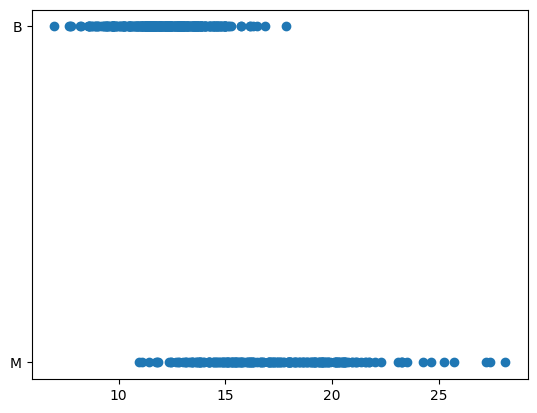

In [145]:
plt.scatter(df.radius_mean,df.diagnosis)
plt.plot()

In [146]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print(df.diagnosis)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


STANDARDIZATION THE DATA 

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


EXTRACTING THE FEATURES TO TRAIN DATA 
WHERE :-

X :-  FEATURES 

Y :- TARGET VARIABLE 


In [148]:
print(df.shape)

(569, 32)


In [149]:
X=df.iloc[0::,2:33]
y=df.diagnosis

In [150]:
print(y)


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [151]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

SPLITTING THE DATA IN TEST TRAIN METHOD 


In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57          142.70     1311.0          0.11410   
63         9.173         13.86           59.20      260.9          0.07721   
248       10.650         25.22           68.01      347.0          0.09657   
60        10.170         14.88           64.55      311.9          0.11340   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     compactness_mean  concavity_mean  concave points_mean  sym

In [153]:
print(y_train)

68     0
181    1
63     0
248    0
60     0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 455, dtype: int64


In [154]:
#print(X_train.info())
print(X_train.describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   455.000000    455.000000      455.000000   455.000000   
mean     14.117635     19.185033       91.882242   654.377582   
std       3.535815      4.266005       24.322027   354.943187   
min       7.691000      9.710000       47.920000   170.400000   
25%      11.705000     16.170000       75.100000   420.300000   
50%      13.300000     18.680000       85.980000   551.700000   
75%      15.740000     21.585000      103.750000   767.600000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       455.000000        455.000000      455.000000           455.000000   
mean          0.095744          0.103619        0.088898             0.048280   
std           0.013923          0.052470        0.079468             0.038060   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [155]:
st=StandardScaler()
st.fit(X_train)
X_st_train=st.transform(X_train)
X_st_test=st.transform(X_test)


In [156]:
X_test1 = pd.DataFrame(X_st_test, columns=X_test.columns)
X_train1=pd.DataFrame(X_st_train,columns=X_train.columns)
print(X_train1.shape, y_train.shape)  # Should both have 455 rows


(455, 30) (455,)


IMPLEMENTINIG LOGISTIC REGRESSION  

In [ ]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(X_train1,y_train)


LogisticRegression()

In [158]:
y_pred=lor.predict(X_test1)

In [160]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9736842105263158
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412
Confusion Matrix:
 [[70  1]
 [ 2 41]]


In [161]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation
scores = cross_val_score(lor, X_train1, y_train, cv=5)

print("Cross-validation scores:", scores)
print("Mean CV Score:", scores.mean())


Cross-validation scores: [0.97802198 0.96703297 1.         0.97802198 0.94505495]
Mean CV Score: 0.9736263736263737
